In [1]:
#importing the important libraries used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In this dataset i want to find who don't use this program or system to start to direct an advertising campaign towards them to increase the comapany's revenue.

## Data exploring

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv") # reading the csv file

## Cleaning the data from duplicated and null values

In [3]:
sum(df.duplicated()) 
# check the duplicated rows in the dataset

0

In [4]:
df.isnull().sum()
#checking the null values in each column of the dataset 

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
df.dropna(inplace = True)
#removing all the columns with null values

In [6]:
df.info()
#recheking the columns and datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [7]:
df.describe()
#rechecking the statistical description

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## exploratory analysis

## Univariate plots

### 1- what is the gender of people who use the system?

In [8]:
x =df.member_gender.value_counts()
x
#checking the counts of gender of the users

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

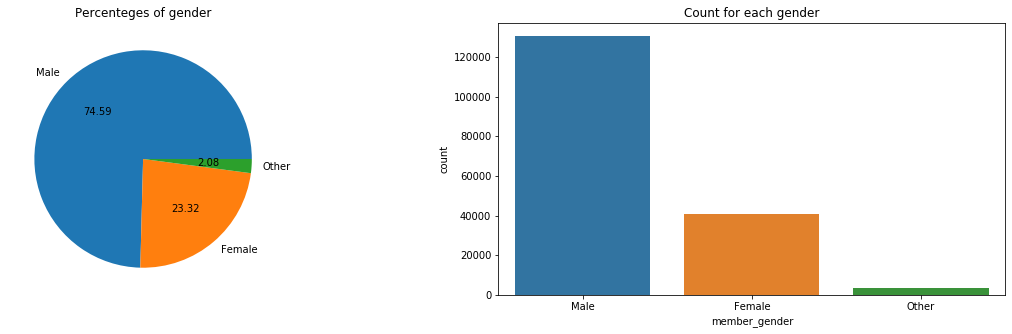

In [9]:
plt.figure(figsize=[20, 5]) #making a place for two plots side by side

plt.subplot(1,2,1) # assigning the place for the first plot
plt.pie(x, labels = ["Male", "Female", "Other"], autopct='%.2f');  # ploting a piechart plot
plt.title('Percenteges of gender'); # adding a title for the plot

plt.subplot(1,2,2) # assigning the place for the Second plot
sb.countplot(data = df, x = 'member_gender', order = ["Male", "Female", "Other"]);  # ploting a barchart plot
plt.title('Count for each gender'); # adding a title for the plot

### conc: from plots we can see a very big portion of males using the system on the other side females represent less than quarter of users

### 2- what are the types of user?

In [10]:
x =df.user_type.value_counts() # getting user typr counts
x

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

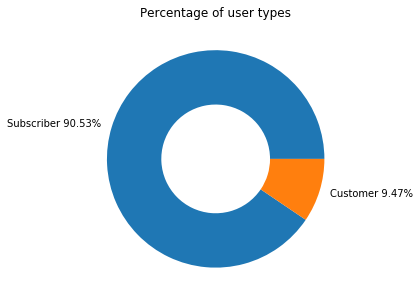

In [11]:
plt.figure(figsize=[5, 5]);
plt.pie(x, labels = ["Subscriber 90.53%", "Customer 9.47%"], wedgeprops={'width':0.5});  # ploting a piechart plot
plt.title('Percentage of user types');# adding a title for the plot

### conc: more than 90% of users are subscriber which means that the system is successful to turn customers to subscribers

### 3- what are the ages of users using the system?

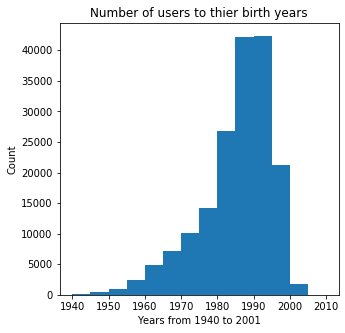

In [12]:
bins = np.arange(1940, 2011, 5)#creating bins for the x-axis

plt.figure(figsize=[5, 5]) # elarging the plot by setting the size manually
plt.hist(data = df, x = 'member_birth_year', bins = bins); # ploting a histogram

plt.xscale('linear'); #choose the scaling of the plot

plt.xlabel('Years from 1940 to 2001'); # adding x-axis label for the plot
plt.ylabel('Count'); # adding a y-axis label for the plot
plt.title('Number of users to thier birth years'); # adding a title for the plot

### conc: more than 80,000 user are born between 1985 and 1995 which means that most of the user are youth and middle aged but there are less users as years decrease

### 4 - How many  people share thier bike in the jorney?

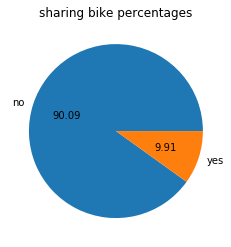

In [13]:
x = df.bike_share_for_all_trip.value_counts()
plt.pie(x,labels=['no','yes'],  autopct='%.2f'); # ploting a piechart plot
plt.title('sharing bike percentages');

### conc: most of the people do not share thier bike.

## Bivariate plots

### 5 - Who uses the bike longer??

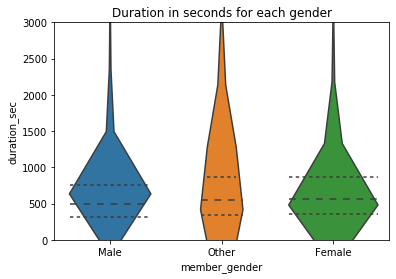

In [14]:
sb.violinplot(data = df, x='member_gender', y='duration_sec', inner = 'quartile');  # ploting a violin plot

plt.ylim([0,3000]); # putting a limit for y-axis to maintain the plot integrity

plt.title('Duration in seconds for each gender'); # adding a title for the plot

there are 1924 row not included in the last plot to maintain its integrity.

### conc: females average riding time is larger than males and others also men have the lowest average.

### 6 - what are the ages of each gender uses the system?

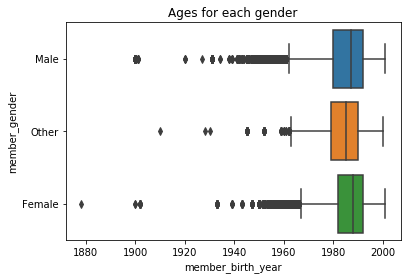

In [15]:
xbins = np.arange(1950, 2001, 10); # setting bins for the x-axis
sb.boxplot(data=df ,x= 'member_birth_year' ,y='member_gender');  # ploting a  box plot
plt.title('Ages for each gender');

### conc: most of the females use the program are young in age but also the oldest user is a female. the other gender has the oldest avg.

### 7 - what are the user types of each gender?

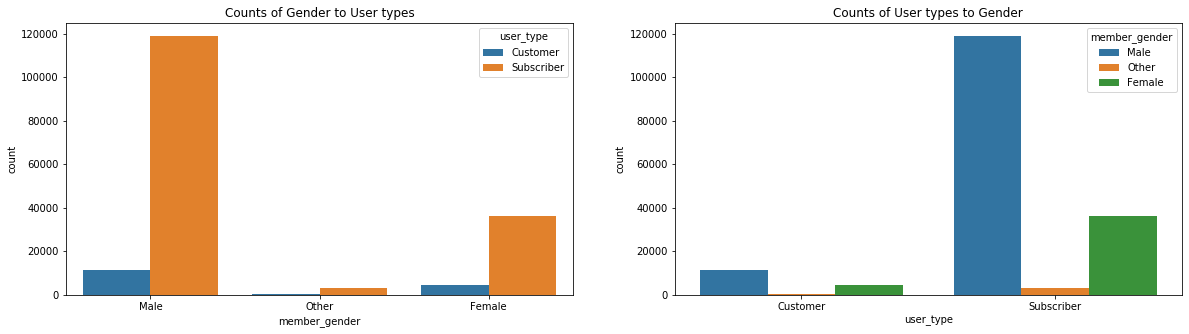

In [16]:
plt.figure(figsize=[20, 5]) #making a place for two plots side by side

plt.subplot(1,2,1) # assigning the place for the first plot
sb.countplot(data = df, x = 'member_gender', hue = 'user_type'); # ploting a barchart plot
plt.title('Counts of Gender to User types');
plt.subplot(1,2,2); # assigning the place for the second plot
sb.countplot(data = df, hue = 'member_gender', x = 'user_type');  # ploting a barchart plot
plt.title('Counts of User types to Gender');

### conc: the company transfer thier random customers to subscribers succesfully.

### 8-  Are the places of end station sam as start one?

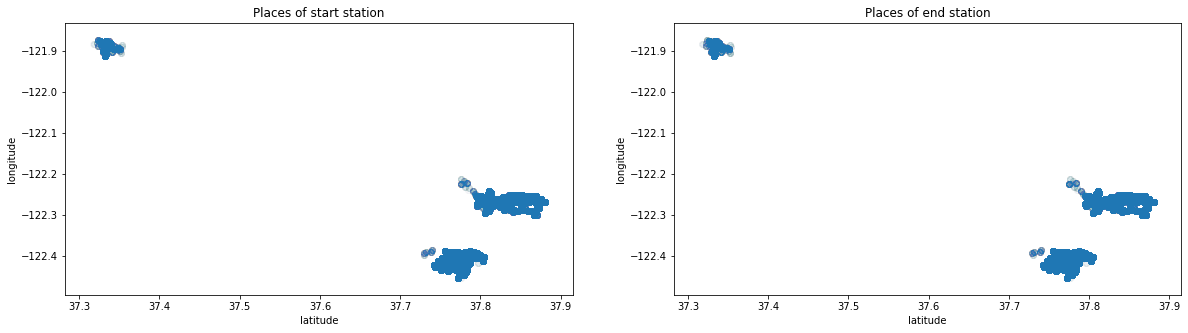

In [17]:
plt.figure(figsize=[20, 5])

plt.subplot(1,2,1)  # assigning the place for the first plot
plt.scatter(data = df, x='start_station_latitude', y='start_station_longitude', alpha = 0.006); # ploting a Scatter plot

plt.title('Places of start station'); # adding a title for the plot
plt.xlabel('latitude'); # adding a X-axis label for the plot
plt.ylabel('longitude');# adding a y-axis label for the plot

plt.subplot(1,2,2) # assigning the place for the second plot
plt.scatter(data = df, x='end_station_latitude', y='end_station_longitude', alpha = 0.006);  # ploting a Scatter plot

plt.title('Places of end station'); # adding a title for the plot
plt.xlabel('latitude');# adding a X-axis label for the plot
plt.ylabel('longitude');# adding a y-axis label for the plot

### conc: the end stations are the same as start stations. a user takes the root on both ways.

## Summary
- I found that the number of female users using the system is very very low to men users number.
- Females use the bike longer than males.
- Average age of females users is younger than that of male users.

## Findings
- An advertisment campaigne should target females users with ages between 18 to 30 years to increase the female users percentage.
- they should also focus on making more bike trips shared between users.